In [6]:
import requests, six # Scrapping
import lxml.html as lh # Convert information for python
from itertools import cycle, islice
from matplotlib import colors
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url = 'http://pokemondb.net/pokedex/all'

page = requests.get(url) # get url and store in page
doc =lh.fromstring(page.content) # store site contents
tr_elements = doc.xpath('//tr') # parse data that are stored between <tr>..</tr> of the site's HTML
[len(T) for T in tr_elements[:12]] # check the length of the first 12 rows

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [8]:
tr_elements = doc.xpath('//tr')

col = [] # create empty list
i = 0

for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    i += 1
    name = t.text_content()
    print('%d: "%s"' %(i, name))
    col.append((name, [])) # tuples

1: "#"
2: "Name"
3: "Type"
4: "Total"
5: "HP"
6: "Attack"
7: "Defense"
8: "Sp. Atk"
9: "Sp. Def"
10: "Speed"


In [9]:
for j in range(1, len(tr_elements)): # first row is header, so start at 1
    T = tr_elements[j] # jth row
    
    if len(T) != 10: # if row is not of size 10, //tr data is not from out table
        break
    
    i = 0
    
    for t in T.iterchildren(): # iterate through each element of the row
        data = t.text_content()
        if i > 0: # check if row is empty 
            try: # convert any numerical value to integers
                data = int(data)
            except:
                pass
        
        col[i][1].append(data) # append the data to the empty list of the i'th column
        i += 1 # increment i for the next column

In [10]:
[len(C) for (title, C) in col] # each column has %d data points

[1075, 1075, 1075, 1075, 1075, 1075, 1075, 1075, 1075, 1075]

In [11]:
Dict = {title:column for (title, column) in col}
df = pd.DataFrame(Dict)

In [12]:
print(df)

        #                      Name             Type  Total   HP  Attack  \
0     001                 Bulbasaur     Grass Poison    318   45      49   
1     002                   Ivysaur     Grass Poison    405   60      62   
2     003                  Venusaur     Grass Poison    525   80      82   
3     003    Venusaur Mega Venusaur     Grass Poison    625   80     100   
4     004                Charmander            Fire     309   39      52   
...   ...                       ...              ...    ...  ...     ...   
1070  902        Basculegion Female      Water Ghost    530  120      92   
1071  903                  Sneasler  Poison Fighting    510   80     130   
1072  904                  Overqwil      Dark Poison    510   85     115   
1073  905  Enamorus Incarnate Forme     Fairy Flying    580   74     115   
1074  905    Enamorus Therian Forme     Fairy Flying    580   74     115   

      Defense  Sp. Atk  Sp. Def  Speed  
0          49       65       65     45  
1    

In [13]:
df.to_json('PokemonData.json') # export to json

In [14]:
df = pd.read_json('PokemonData.json') # test to see if data is stored properly
df = df.set_index(['#'])
df.head()

,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,Charmander,Fire,309,39,52,43,60,50,65


In [15]:
def max_stats(df, col_list): # take the max stat of each column
    message = ''
    for col in col_list:
        stat = df[col].max()
        name = df[df[col] == df[col].max()]['Name'].values[0]
        message += name + ' has the greatest ' + col + ' of ' + str(stat) + '\n'
    return message

def min_stats(df, col_list):
    message = ''
    for col in col_list:
        stat = df[col].min()
        name = df[df[col] == df[col].min()]['Name'].values[0]
        message += name + ' has the worst ' + col + ' of ' + str(stat) + '\n'
    return message

In [16]:
stats = ['Attack', 'Defense', 'HP', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']
print (max_stats(df, stats))
print (min_stats(df, stats))

Mewtwo Mega Mewtwo X has the greatest Attack of 190
Eternatus Eternamax has the greatest Defense of 250
Blissey has the greatest HP of 255
Mewtwo Mega Mewtwo Y has the greatest Sp. Atk of 194
Eternatus Eternamax has the greatest Sp. Def of 250
Regieleki has the greatest Speed of 200
Eternatus Eternamax has the greatest Total of 1125

Chansey has the worst Attack of 5
Chansey has the worst Defense of 5
Shedinja has the worst HP of 1
Sandshrew Alolan Sandshrew has the worst Sp. Atk of 10
Caterpie has the worst Sp. Def of 20
Shuckle has the worst Speed of 5
Wishiwashi Solo Form has the worst Total of 175



array([[<AxesSubplot:xlabel='Attack', ylabel='Attack'>,
        <AxesSubplot:xlabel='Defense', ylabel='Attack'>,
        <AxesSubplot:xlabel='HP', ylabel='Attack'>,
        <AxesSubplot:xlabel='Sp. Atk', ylabel='Attack'>,
        <AxesSubplot:xlabel='Sp. Def', ylabel='Attack'>,
        <AxesSubplot:xlabel='Speed', ylabel='Attack'>,
        <AxesSubplot:xlabel='Total', ylabel='Attack'>],
       [<AxesSubplot:xlabel='Attack', ylabel='Defense'>,
        <AxesSubplot:xlabel='Defense', ylabel='Defense'>,
        <AxesSubplot:xlabel='HP', ylabel='Defense'>,
        <AxesSubplot:xlabel='Sp. Atk', ylabel='Defense'>,
        <AxesSubplot:xlabel='Sp. Def', ylabel='Defense'>,
        <AxesSubplot:xlabel='Speed', ylabel='Defense'>,
        <AxesSubplot:xlabel='Total', ylabel='Defense'>],
       [<AxesSubplot:xlabel='Attack', ylabel='HP'>,
        <AxesSubplot:xlabel='Defense', ylabel='HP'>,
        <AxesSubplot:xlabel='HP', ylabel='HP'>,
        <AxesSubplot:xlabel='Sp. Atk', ylabel='HP'>,
       

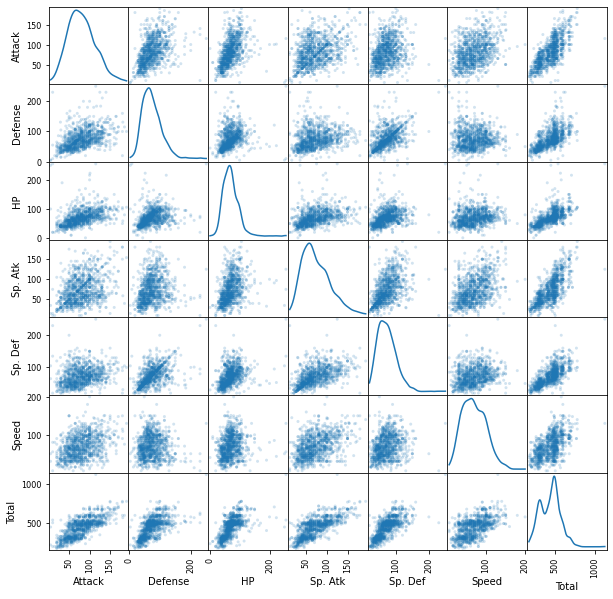

In [21]:
scatter_matrix(df[stats], alpha = 0.2, figsize= (10, 10), diagonal= 'kde')

In [3]:
import sys, urllib
from PySide6 import QtCore, QtGui, QtWidgets
class PokeDex(QtGui.QWidget):
    def __init__(self):
        super(PokeDex, self).__init__()
        self.initUI()
        
    def initUI(self):
        # grid layout
        self.grid = QtGui.QGridLayout()
        self.setLayout(self.grid)
    
        # Parse JSON for DataFrame
        self.df = pd.read_json("PokemonData.json")
        self.df = self.df.set_index(['#'])
        
        # Drop Down
        self.dropdown = QtGui.QComboBox(self)
        self.names = self.df['Name'].values
        self.dropdown.addItems(self.names)
        self.grid.addWidget(self.dropdown, 0,0,1,1)
        
        # Search Button
        self.btn = QtGui.QPushButton('Search', self)
        self.btn.clicked.connect(self.runSearch)
        self.grid.addWidget(self.btn, 0,1,1,1)
        
        # Image
        self.img = QtGui.QLabel(self)
        self.grid.addWidget(self.img, 1,1,1,1)
        
        # Data
        self.label = QtGui.QLabel(self)
        self.label.setAlignment(QtCore.Qt.AlignCenter)
        self.label.setText('\nName:\n\nTypr:\n\nHp:\n\nAttack:\n\nSp. Attack:\n\nDefense:\n\nSp. Defense:\n\nSpeed:\n\nTotal:\n\n')
        self.label.setAlignment(QtCore.Qt.AlignLeft)
        self.grid.addWidget(self.label, 1, 0, 1, 1)
        
        # Customize Widgets
        self.resize(500, 250)
        self.center()
        self.setWindowTitle('PokeDex')
        self.show()
        
        

AttributeError: module 'PySide6.QtGui' has no attribute 'QWidget'